In [80]:
#from google.colab import drive
#drive.mount('/content/drive')

In [81]:
import pandas as pd
import numpy as np

In [82]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [83]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [84]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [85]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [86]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=6:
        a.append(i)

In [87]:
df = df.drop(a)

In [88]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
134664,1958,1,0,30.4,20.3,17,1.8,maharashtra,greater bombay,13,6,13,15,13,1,2,6
134665,1958,2,0,29.8,20.5,10,1.7,maharashtra,greater bombay,13,6,13,15,13,1,2,6
134666,1958,3,1,32.1,22.5,8,1.7,maharashtra,greater bombay,13,6,13,15,13,1,2,6
134667,1958,4,11,32.9,25.2,15,1.6,maharashtra,greater bombay,13,6,13,15,13,1,2,6
134668,1958,5,64,33.3,27.3,64,2.7,maharashtra,greater bombay,13,6,13,15,13,1,2,6


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 134664 to 409199
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            5952 non-null   int64  
 1   Month           5952 non-null   int64  
 2   ppt(mm)         5952 non-null   int64  
 3   tmax(degC)      5952 non-null   float64
 4   tmin(degC)      5952 non-null   float64
 5   aet(mm)         5952 non-null   int64  
 6   PDSI(unitless)  5952 non-null   float64
 7   state           5952 non-null   object 
 8   district        5952 non-null   object 
 9   cluster14       5952 non-null   int64  
 10  cluster15       5952 non-null   int64  
 11  cluster18       5952 non-null   int64  
 12  cluster20       5952 non-null   int64  
 13  cluster25       5952 non-null   int64  
 14  cluster27       5952 non-null   int64  
 15  cluster30       5952 non-null   int64  
 16  cluster35       5952 non-null   int64  
dtypes: float64(3), int64(12), 

In [90]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(5952, 8)

In [91]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [92]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
134664,1958,1,0,30.4,20.3,17,1.8,greater bombay,1-1958
134665,1958,2,0,29.8,20.5,10,1.7,greater bombay,2-1958
134666,1958,3,1,32.1,22.5,8,1.7,greater bombay,3-1958
134667,1958,4,11,32.9,25.2,15,1.6,greater bombay,4-1958
134668,1958,5,64,33.3,27.3,64,2.7,greater bombay,5-1958


In [93]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
134664,1958,1,0,30.4,20.3,17,1.8,greater bombay,1958-01-01,1
134665,1958,2,0,29.8,20.5,10,1.7,greater bombay,1958-02-01,1
134666,1958,3,1,32.1,22.5,8,1.7,greater bombay,1958-03-01,1
134667,1958,4,11,32.9,25.2,15,1.6,greater bombay,1958-04-01,1
134668,1958,5,64,33.3,27.3,64,2.7,greater bombay,1958-05-01,1


In [95]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
134664,1958,1,0,17,1.8,greater bombay,1958-01-01,1,25.35
134665,1958,2,0,10,1.7,greater bombay,1958-02-01,1,25.15
134666,1958,3,1,8,1.7,greater bombay,1958-03-01,1,27.30
134667,1958,4,11,15,1.6,greater bombay,1958-04-01,1,29.05
134668,1958,5,64,64,2.7,greater bombay,1958-05-01,1,30.30


In [96]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
409195,2019,8,740,103,-3.2,ratnagiri,2019-08-01,1,27.00
409196,2019,9,769,91,4.0,ratnagiri,2019-09-01,1,26.70
409197,2019,10,432,104,8.9,ratnagiri,2019-10-01,1,27.50
409198,2019,11,13,82,7.6,ratnagiri,2019-11-01,1,27.85
409199,2019,12,1,70,6.7,ratnagiri,2019-12-01,1,27.50


In [97]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,1,23.55,14,greater bombay
1,1981-02-01,0,24.90,9,greater bombay
2,1981-03-01,0,26.60,6,greater bombay
3,1981-04-01,1,28.30,5,greater bombay
4,1981-05-01,6,29.70,9,greater bombay


In [98]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
135396,2019,1,0,13,-4.6,greater bombay,2019-01-01,1,23.20
135397,2019,2,0,8,-4.3,greater bombay,2019-02-01,1,23.95
135398,2019,3,0,6,-4.0,greater bombay,2019-03-01,1,26.40
135399,2019,4,0,4,-4.1,greater bombay,2019-04-01,1,29.05
135400,2019,5,2,5,-4.7,greater bombay,2019-05-01,1,30.00
...,...,...,...,...,...,...,...,...,...
409195,2019,8,740,103,-3.2,ratnagiri,2019-08-01,1,27.00
409196,2019,9,769,91,4.0,ratnagiri,2019-09-01,1,26.70
409197,2019,10,432,104,8.9,ratnagiri,2019-10-01,1,27.50
409198,2019,11,13,82,7.6,ratnagiri,2019-11-01,1,27.85


In [99]:
from fbprophet import Prophet

In [100]:

model = Prophet()

In [101]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
3643,2018-08-01,348,26.50,101,ratnagiri
3644,2018-09-01,125,26.60,107,ratnagiri
3645,2018-10-01,51,28.45,96,ratnagiri
3646,2018-11-01,9,28.20,78,ratnagiri
3647,2018-12-01,5,26.35,72,ratnagiri


In [104]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [106]:

forecast = model.predict(fut)

In [107]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,24.755944,20.939821,27.290156,24.755934,24.755960,-0.607614,-0.607614,-0.607614,-0.607614,-0.607614,-0.607614,0.0,0.0,0.0,24.148330
465,2019-09-30,24.756577,21.689112,28.313789,24.756563,24.756596,0.311842,0.311842,0.311842,0.311842,0.311842,0.311842,0.0,0.0,0.0,25.068419
466,2019-10-31,24.757230,20.919193,27.490508,24.757212,24.757256,-0.536170,-0.536170,-0.536170,-0.536170,-0.536170,-0.536170,0.0,0.0,0.0,24.221061
467,2019-11-30,24.757863,19.845431,26.591190,24.757840,24.757894,-1.618323,-1.618323,-1.618323,-1.618323,-1.618323,-1.618323,0.0,0.0,0.0,23.139540
468,2019-12-31,24.758516,19.404382,25.633591,24.758489,24.758553,-2.167302,-2.167302,-2.167302,-2.167302,-2.167302,-2.167302,0.0,0.0,0.0,22.591214


In [108]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,24.148330,20.939821,27.290156
465,2019-09-30,25.068419,21.689112,28.313789
466,2019-10-31,24.221061,20.919193,27.490508
467,2019-11-30,23.139540,19.845431,26.591190
468,2019-12-31,22.591214,19.404382,25.633591


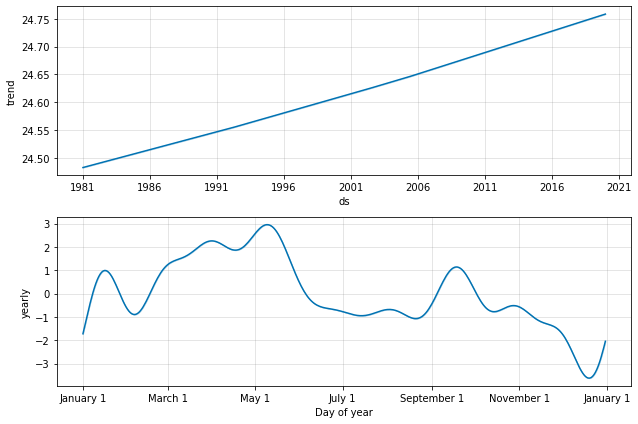

In [109]:
fig2 = model.plot_components(forecast)

In [110]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (96, 1)
8.21036855786837


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,23.20,1,24.236603
1,21.20,1,24.236603
2,23.20,1,24.236603
3,21.25,1,24.236603
4,19.90,1,24.236603
...,...,...,...
91,22.30,12,22.591214
92,20.70,12,22.591214
93,20.70,12,22.591214
94,26.30,12,22.591214


In [111]:
import matplotlib.pyplot as plt

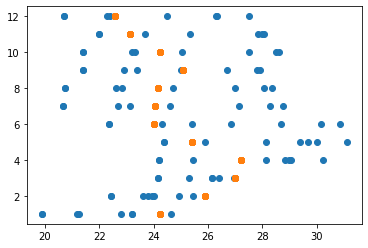

In [112]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [113]:
import pickle

In [114]:
filename = 'Cluster 15 - 6.sav'
pickle.dump(model, open(filename, 'wb'))

In [115]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [116]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,24.482452,19.450255,25.889534,24.482452,24.482452,-1.721698,-1.721698,-1.721698,-1.721698,-1.721698,-1.721698,0.0,0.0,0.0,22.760754
1,1981-02-01,24.482997,20.455652,27.234977,24.482997,24.482997,-0.668653,-0.668653,-0.668653,-0.668653,-0.668653,-0.668653,0.0,0.0,0.0,23.814344
2,1981-03-01,24.483489,22.568008,29.024691,24.483489,24.483489,1.236596,1.236596,1.236596,1.236596,1.236596,1.236596,0.0,0.0,0.0,25.720085
3,1981-04-01,24.484034,23.557901,30.175949,24.484034,24.484034,2.257819,2.257819,2.257819,2.257819,2.257819,2.257819,0.0,0.0,0.0,26.741853
4,1981-05-01,24.484561,23.676832,30.279300,24.484561,24.484561,2.574364,2.574364,2.574364,2.574364,2.574364,2.574364,0.0,0.0,0.0,27.058925
